##### Dataset

In [2]:
# banknotes.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Load the dataset

In [7]:
df = pd.read_csv('banknotes.csv')

In [8]:
df.shape

(1372, 5)

In [56]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [10]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [11]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

##### Separate the input and output variables

In [13]:
# input data
x = df.drop('Class', axis = 1)

# output data
y = df['Class']

##### Explore the data

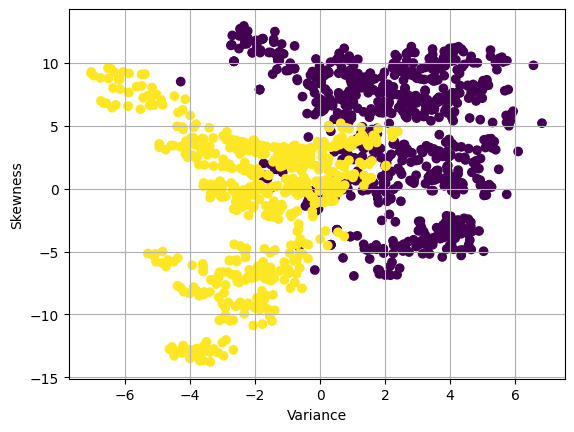

In [18]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.grid()
plt.scatter(df['Variance'], df['Skewness'], c = y)

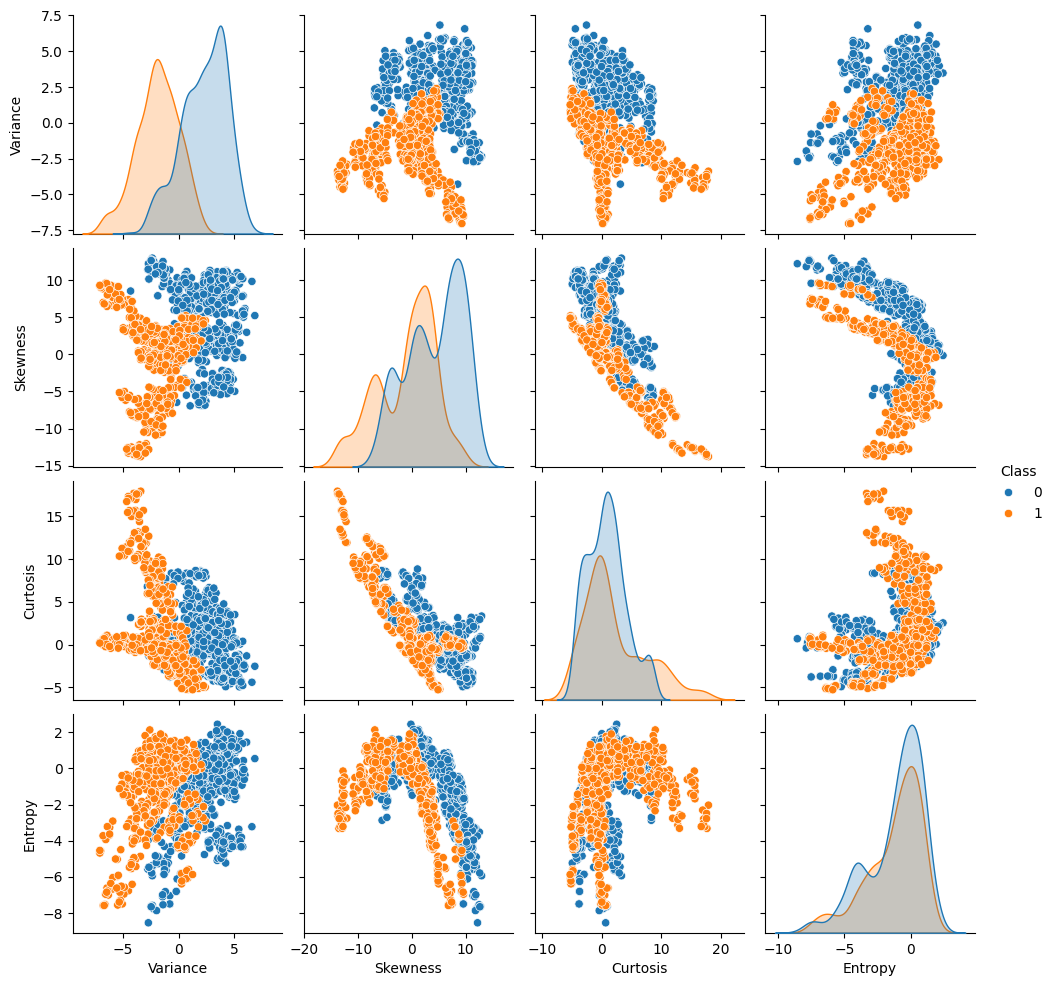

In [19]:
sns.pairplot(df, hue='Class')

In [20]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

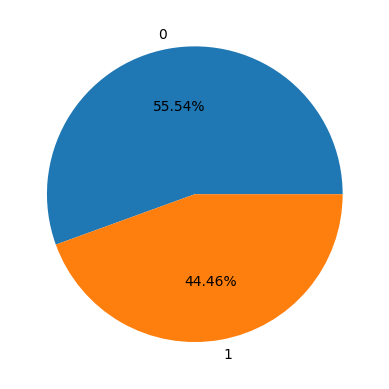

In [23]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [24]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


##### Cross-Validation

In [26]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [38]:
x_train.shape

(1029, 4)

In [39]:
x_test.shape

(343, 4)

##### Build the model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(random_state=0)

In [42]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

##### Performance Evaluation

In [44]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [45]:
y_pred = dt.predict(x_test)

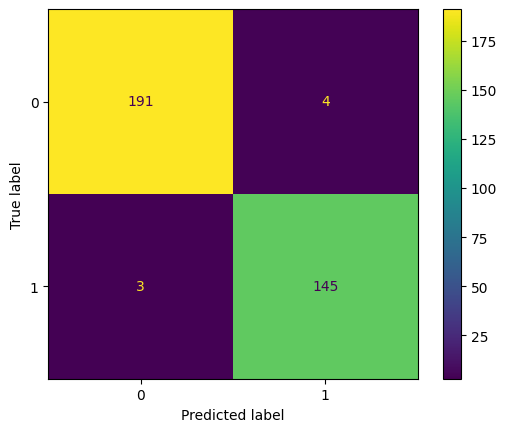

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [48]:
accuracy_score(y_test, y_pred)

0.9795918367346939

##### Feature Importances

<BarContainer object of 4 artists>

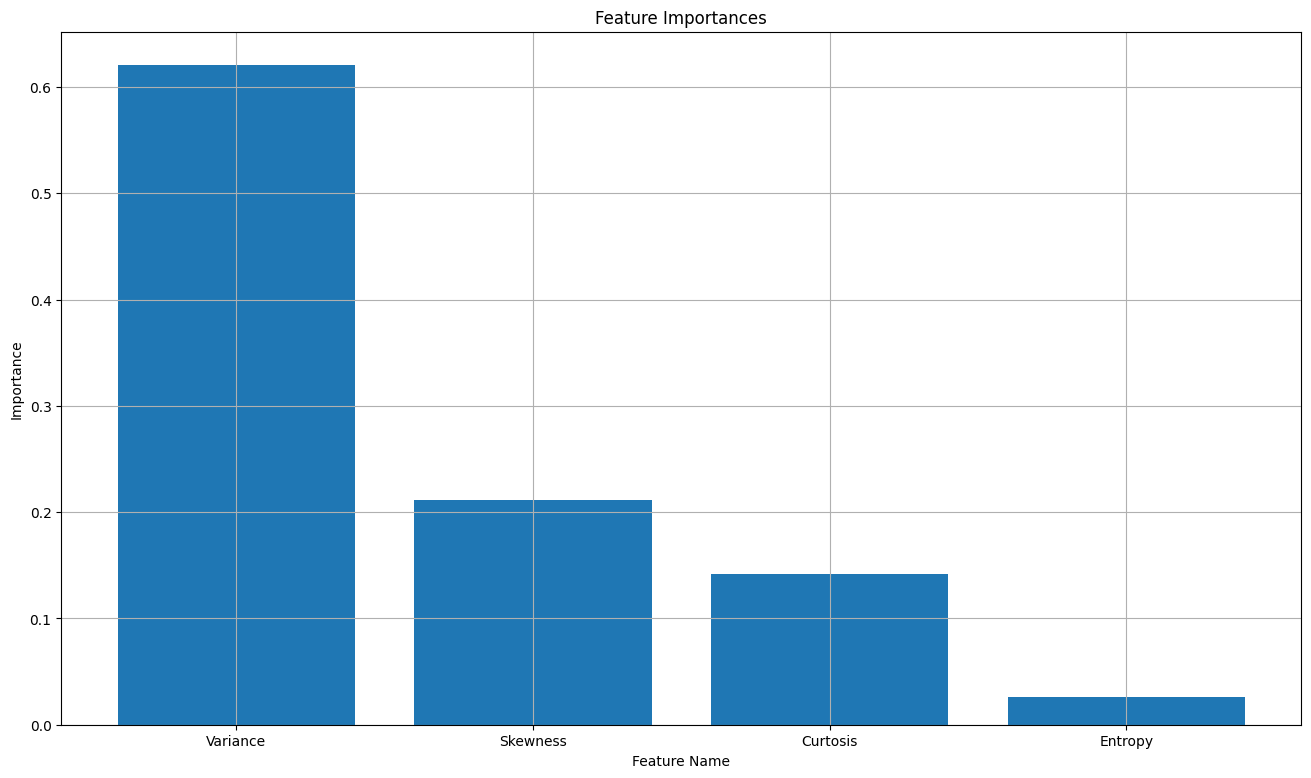

In [50]:
plt.figure(figsize=(16,9))
plt.title('Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns, dt.feature_importances_)

##### Visualize the tree

In [52]:
from sklearn.tree import plot_tree

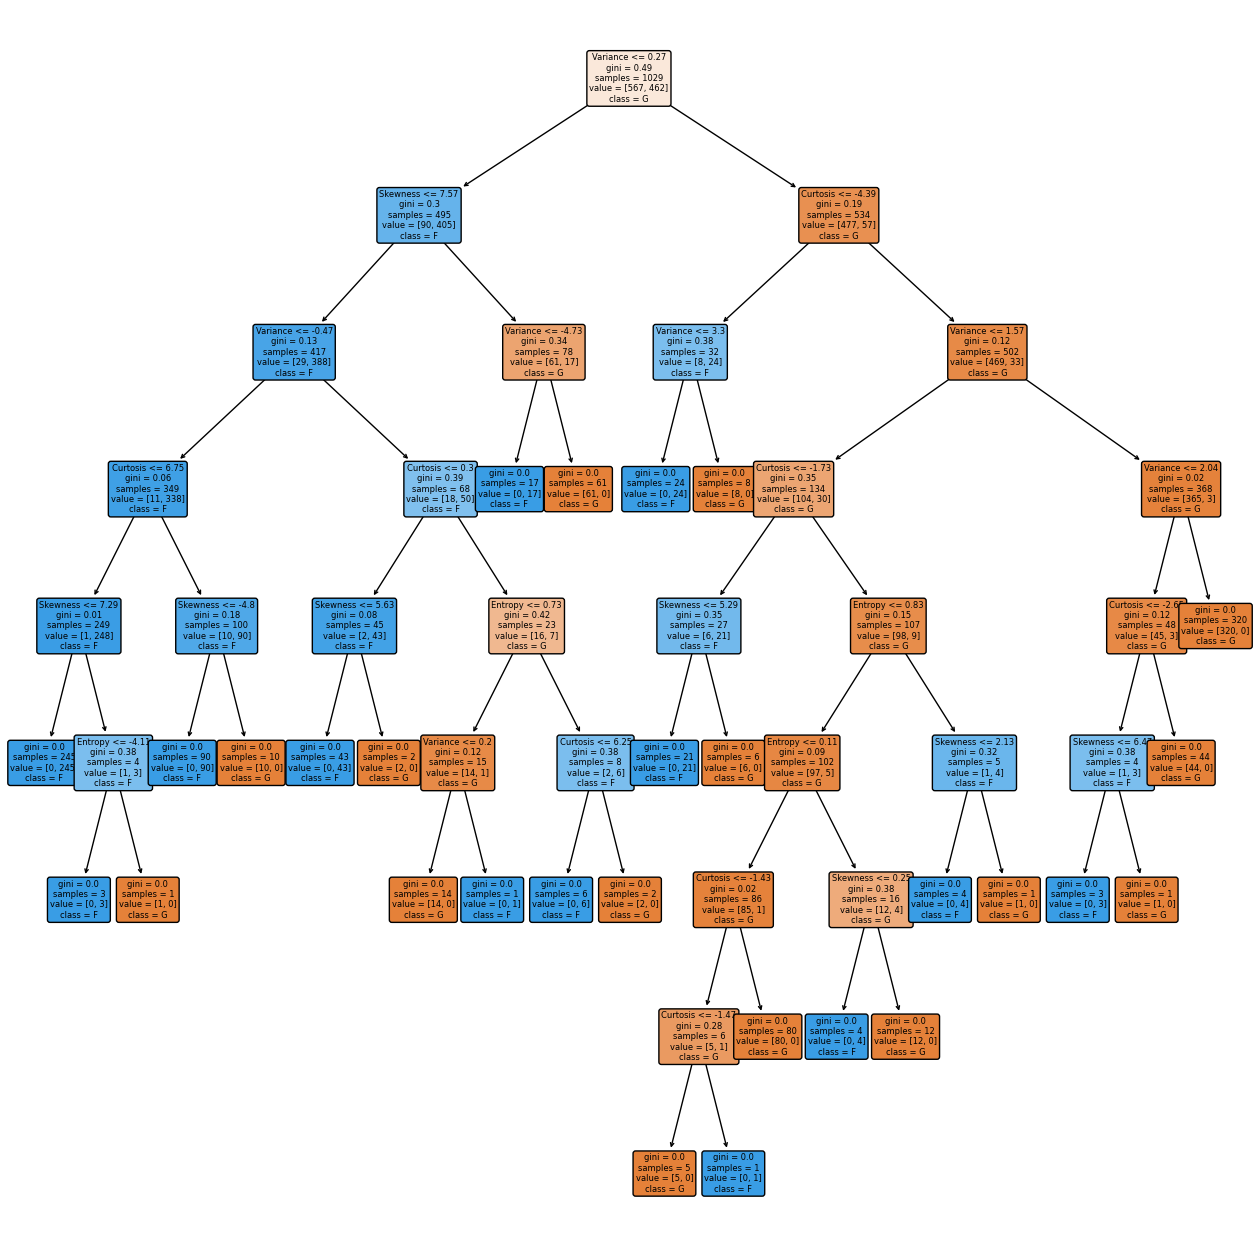

In [55]:
plt.figure(figsize=(16,16))
plot_tree(dt, fontsize=6, feature_names=x.columns, class_names=['G','F'],
         filled=True, rounded=True, precision=2);

##### Prediction on unseen data

In [59]:
new = pd.DataFrame([[0.40614, 1.34920, -1.4501, -0.55949],	
                    [3.45660, 9.52280, -4.0112, -3.59440],
                    [4.54590, 8.16740, -2.4586, -1.46210]], columns=x.columns)

In [60]:
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.55949
1,3.45660,9.5228,-4.0112,-3.59440
2,4.54590,8.1674,-2.4586,-1.46210


In [61]:
dt.predict(new)

array([1, 0, 0])

##### Random Forest Classification

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(random_state=0, n_estimators=10)

In [66]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [67]:
y_pred = rf.predict(x_test)

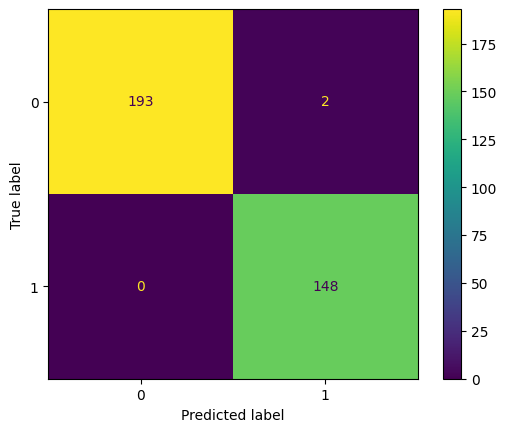

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [70]:
accuracy_score(y_test, y_pred)

0.9941690962099126

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

